<a href="https://colab.research.google.com/github/KamilBienias/data-science/blob/main/kursPawe%C5%82Krakowiak/ML-decision-trees-and-random-forests/random_forest/02_blob_clf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

In [ ]:
print("#############################################")
print("Etap9. Odcinek2: Model lasu losowego")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#############################################
Etap9. Odcinek2: Model lasu losowego


Współrzędne punktów X =
[[ 0.02458305  2.96215652]
 [-1.52392631  7.12573205]
 [ 1.27450825  5.63017322]
 [-0.86552334  7.80121774]
 [ 0.74874067  2.55579434]
 [ 4.35918422 -0.16235216]
 [-1.9957682   0.71644098]
 [ 1.70536064  4.43277024]
 [ 0.4906169   8.82985441]
 [-0.3529955   9.21042408]]

Targety y =
[1 3 0 3 1 1 2 0 3 3]


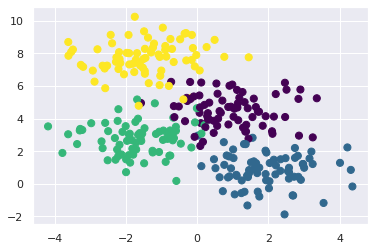

In [ ]:
from sklearn.datasets import make_blobs

# są 4 centra. Blob to kropelka.
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

print("Współrzędne punktów X =")
print(X[:10])

print()
print("Targety y =")
print(y[:10])

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis');

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


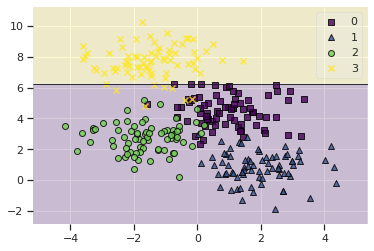

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=1)
# pomija train i test, żeby pokazać ideę działania metod zespołowych 
# jakimi są lasy losowe
clf.fit(X, y)

from mlxtend.plotting import plot_decision_regions
# rysowanie granic decyzyjnych
plot_decision_regions(X, y, clf, colors='#440154FF,#39568CFF,#73D055FF,#FDE725FF', contourf_kwargs={'alpha': 0.2})

In [ ]:
clf.score(X, y)

0.4766666666666667

### Ensemble Methods (metody zespołowe)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# klasa BaggingClassifier 
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
# n_estimators to liczba estymatorów na podstawie których chcemy trenować metody zespołowe
# max_samples=0.8 robi że każdy estymator trenuje na 80% dostępnych danych i to
# powoduje regularyzację naszego modelu, czyli nie będze skłonny do przeuczeń
bag = BaggingClassifier(base_estimator=tree, n_estimators=100, max_samples=0.8, random_state=1)
bag.fit(X, y)


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


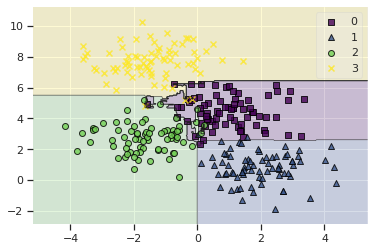

In [ ]:
plot_decision_regions(X, y, bag, colors='#440154FF,#39568CFF,#73D055FF,#FDE725FF', contourf_kwargs={'alpha': 0.2})

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


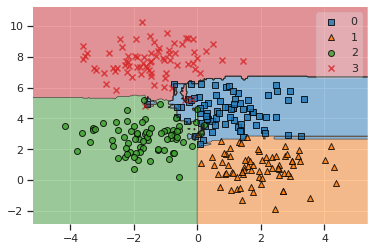

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# ten sam model co powyżej ale w jednym kroku
# czyli modelem zespołowym którym jest las losowy
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X, y)
# tu pominięte parametry colors i contourf_kwargs, ale to tylko wygląd zmienia
plot_decision_regions(X, y, forest)